### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-22,478759,5377529,812069,618366,298161,148038,136077,294322,123101,109753,88937,129586,131211,4849,202375
2021-12-23,479133,5386736,815423,618492,298359,148187,136245,295296,123280,110124,89019,129640,131262,4849,202424
2021-12-24,479520,5392790,816436,618655,298670,148324,136386,296268,123447,110279,89019,129686,131306,4849,202424
2021-12-25,479682,5396894,816533,618686,298759,148324,136530,297223,123531,110367,89019,129729,131348,4849,202488
2021-12-26,479997,5400292,816609,618732,298759,148324,136611,298165,123627,110436,89019,129761,131400,4849,202488


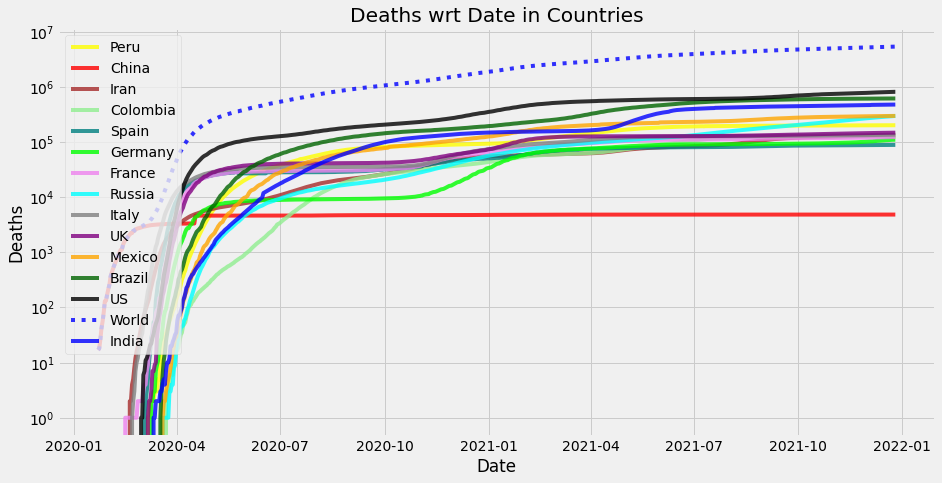

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-22,7495,899967,241051,3226,2980,105790,36326,25038,84312,44313,60041,1931,2103,106,1782
2021-12-23,6650,983304,261339,3774,3319,123255,44585,25446,91640,34420,72912,2475,1932,89,2052
2021-12-24,7189,714262,151915,3680,6883,121932,50590,24522,94126,4068,0,3060,1967,145,0
2021-12-25,6987,587759,132171,3674,2916,87,54787,24771,104611,17238,0,3414,1121,71,7258
2021-12-26,6531,472215,181948,4969,0,0,24882,23543,27697,10172,0,3022,1857,217,0


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-22,8117,640433,132857,5766,2338,65774,19454,29821,45941,43612,22700,1988,3328,81,1483
2021-12-23,8019,663291,141423,5634,2403,69606,21129,29529,48987,42999,26048,2020,3235,81,1521
2021-12-24,7963,666689,142122,5503,2702,73094,23093,29196,51996,40404,24311,2090,3150,85,1419
2021-12-25,7898,661427,141459,5381,2716,68227,25206,28901,55504,38859,22690,2178,3015,84,1809
2021-12-26,7807,648813,144158,5354,2535,63678,25185,28543,53650,36947,21178,2234,2938,93,1688


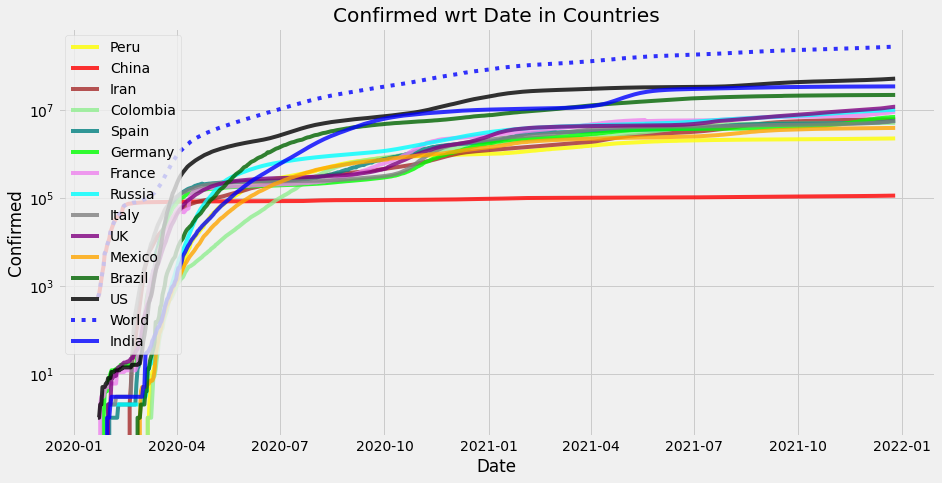

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-22,434,8053,2024,146,245,142,146,993,170,425,50,52,44,0,37
2021-12-23,374,9207,3354,126,198,149,168,974,179,371,82,54,51,0,49
2021-12-24,387,6054,1013,163,311,137,141,972,167,155,0,46,44,0,0
2021-12-25,162,4104,97,31,89,0,144,955,84,88,0,43,42,0,64
2021-12-26,315,3398,76,46,0,0,81,942,96,69,0,32,52,0,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-22,364.47,7014.25,1345.71,135.26,167.33,116.56,116.38,1066.45,150.39,374.37,47.06,47.66,55.56,0.0,58.41
2021-12-23,365.66,7288.35,1596.74,134.11,171.17,120.62,122.83,1054.90,153.96,373.95,51.43,48.45,54.99,0.0,57.24
2021-12-24,368.33,7134.05,1523.78,137.72,188.65,122.66,125.10,1044.53,155.59,346.58,45.00,48.14,53.62,0.0,50.08
2021-12-25,342.54,6755.30,1345.43,124.38,176.19,107.33,127.46,1033.34,146.64,314.26,39.38,47.50,52.17,0.0,51.82
2021-12-26,339.09,6335.63,1186.75,114.58,154.17,93.92,121.66,1021.92,140.31,283.60,34.46,45.56,52.14,0.0,45.34


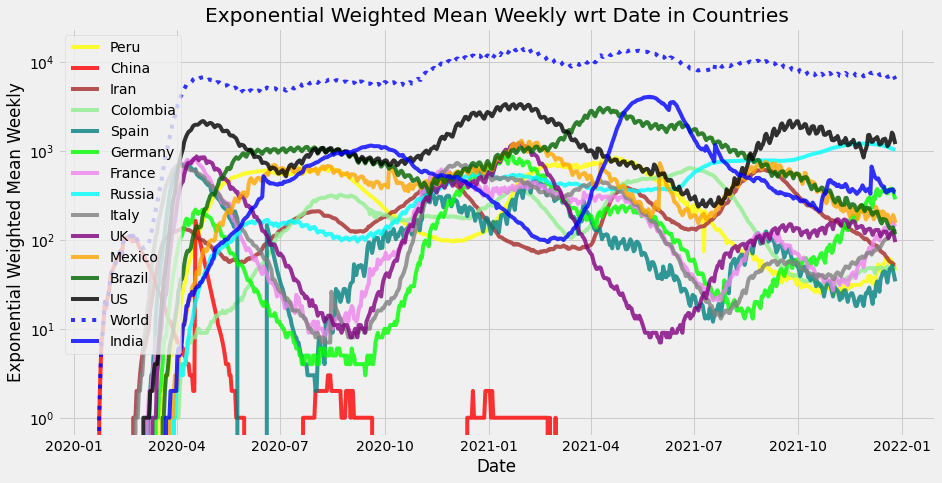

In [18]:
plotter(np.round(AVG), name)

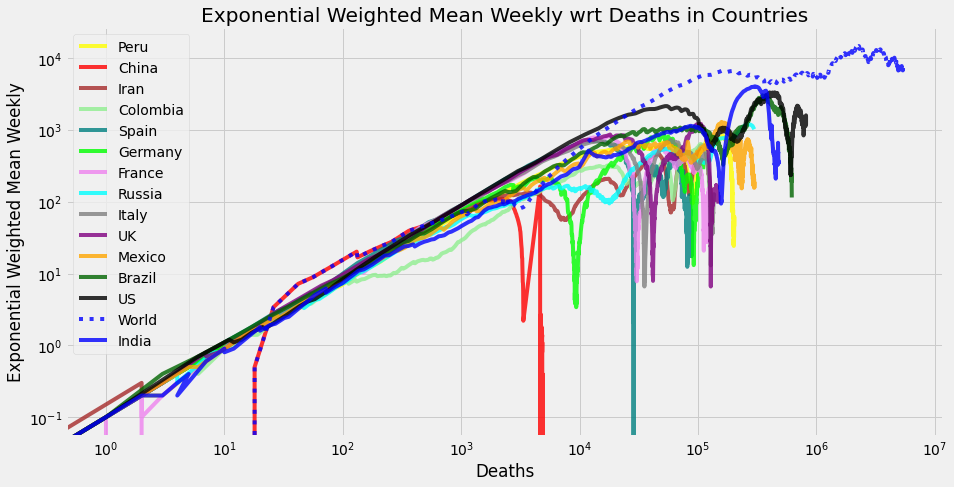

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

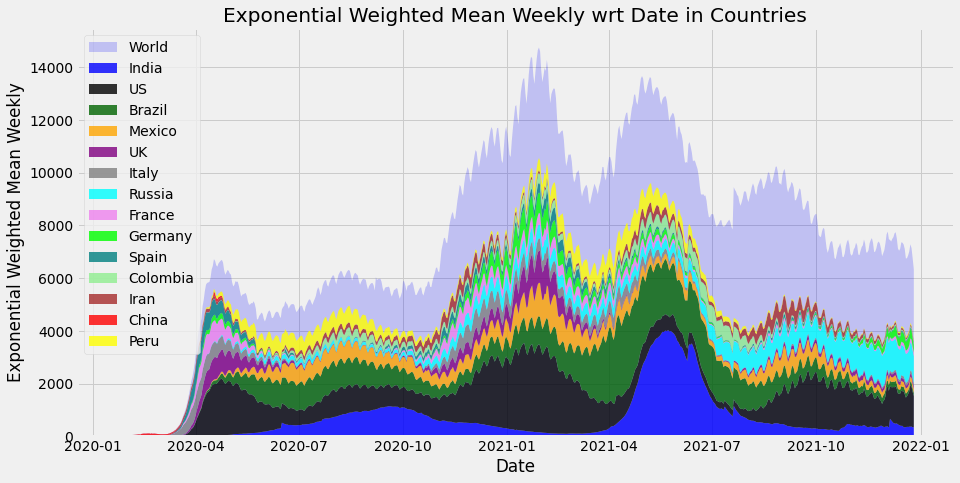

In [20]:
stackplotter(AVG, name)

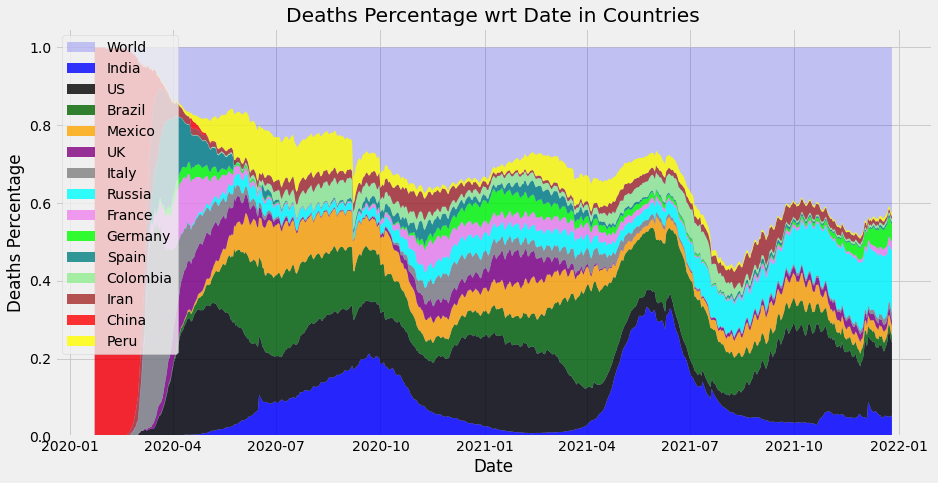

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

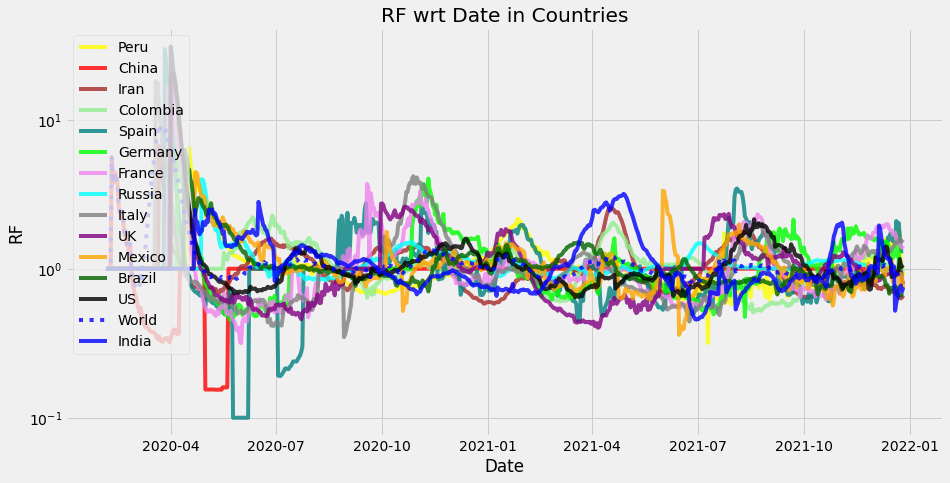

In [23]:
plotter(Reproductivity, 'RF')

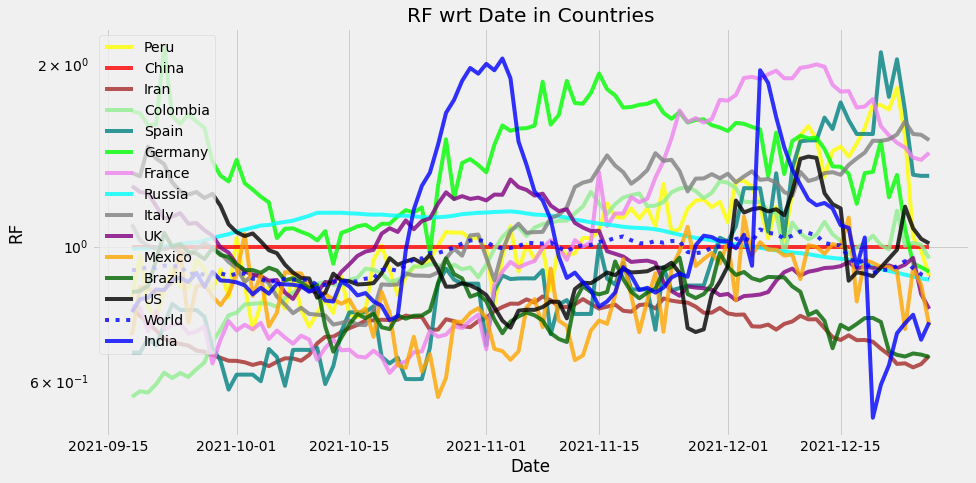

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

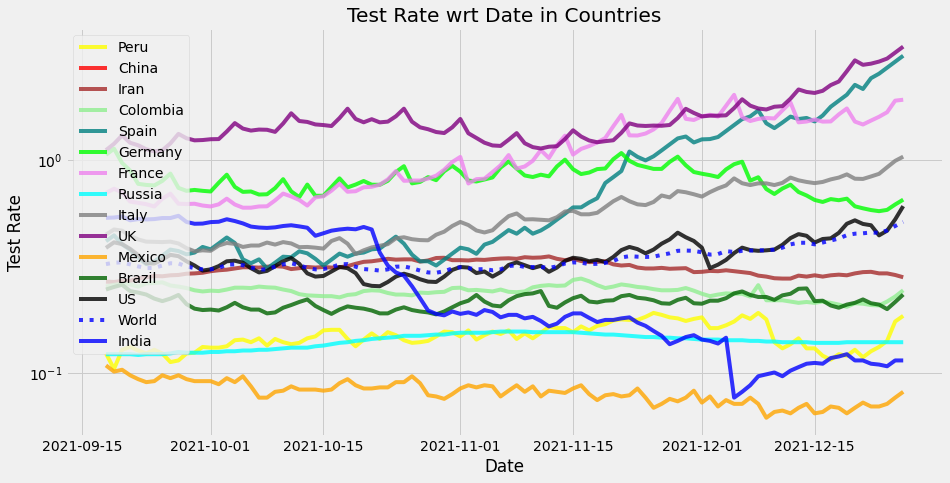

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

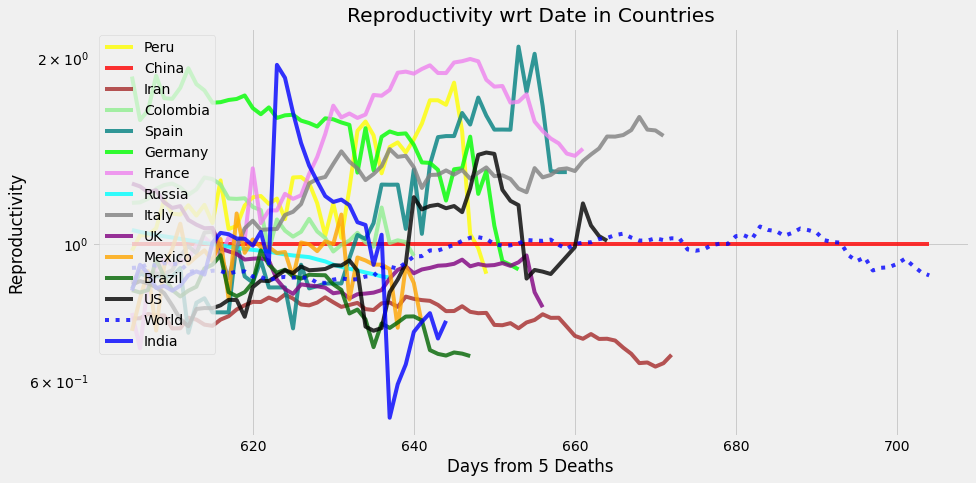

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

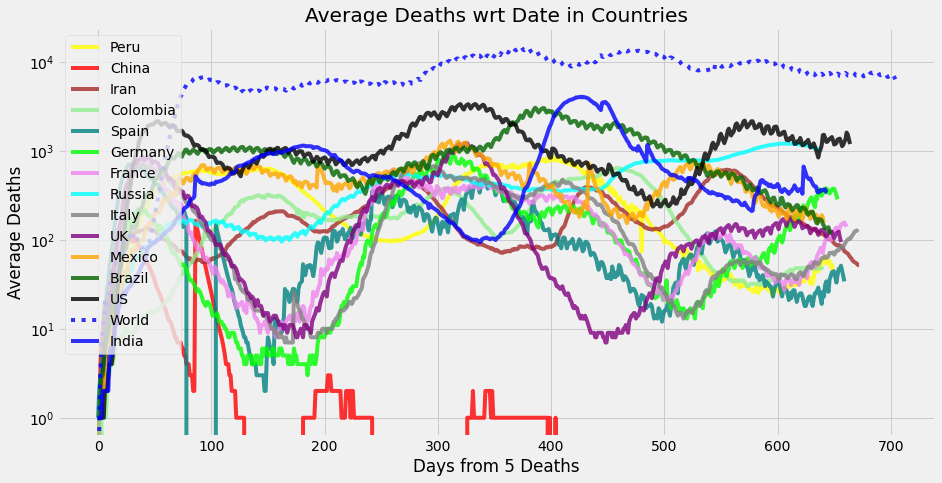

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

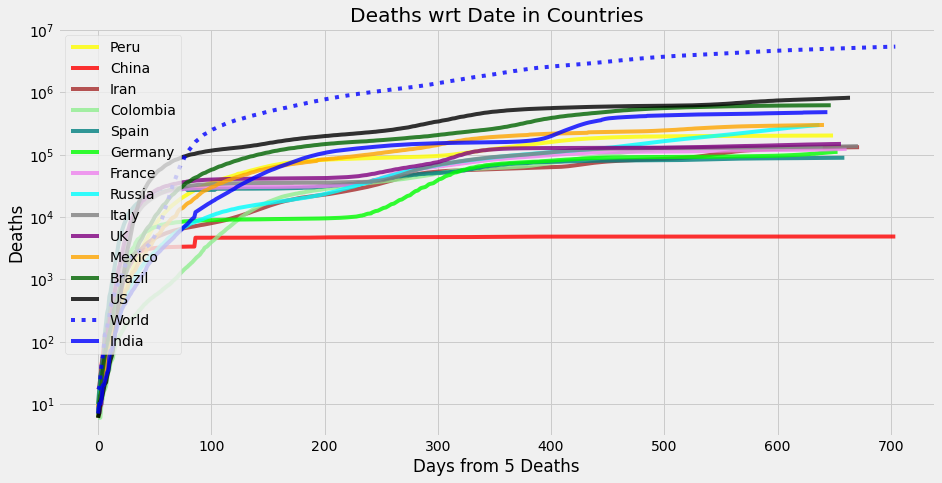

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5400292,3398,6466.14,6335.63,0.8890,279951377,0.512,648813,1080.06
US,816609,76,1408.57,1186.75,1.0116,52280854,0.607,144158,163.32
Brazil,618732,46,95.14,114.58,0.6579,22243266,0.234,5354,123.75
India,479997,315,349.00,339.09,0.7503,34793333,0.115,7807,96.00
Mexico,298759,0,132.00,154.17,0.7421,3950200,0.082,2535,59.75
Russia,298165,942,975.57,1021.92,0.8821,10213265,0.140,28543,59.63
Peru,202488,0,37.57,45.34,0.8946,2278807,0.186,1688,40.50
UK,148324,0,92.14,93.92,0.7894,11958928,3.390,63678,29.66
Indonesia,144053,0,7.29,7.40,1.0000,4261667,NaN,236,28.81


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5400292,3398,6466.14,6335.63,0.8890,279951377,0.512,648813,1080.06
US,816609,76,1408.57,1186.75,1.0116,52280854,0.607,144158,163.32
Russia,298165,942,975.57,1021.92,0.8821,10213265,0.140,28543,59.63
Poland,94327,16,406.00,391.29,1.0554,4049838,0.221,17324,18.87
India,479997,315,349.00,339.09,0.7503,34793333,0.115,7807,96.00
Germany,110436,69,297.14,283.60,0.9092,7009648,0.651,36947,22.09
Ukraine,100891,164,274.14,309.60,0.6702,3823879,0.141,8724,20.18
Vietnam,31214,207,235.43,231.92,1.1348,1651673,0.333,15424,6.24
Turkey,81576,318,165.86,174.38,0.9039,9309094,0.585,20417,16.32


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5400292


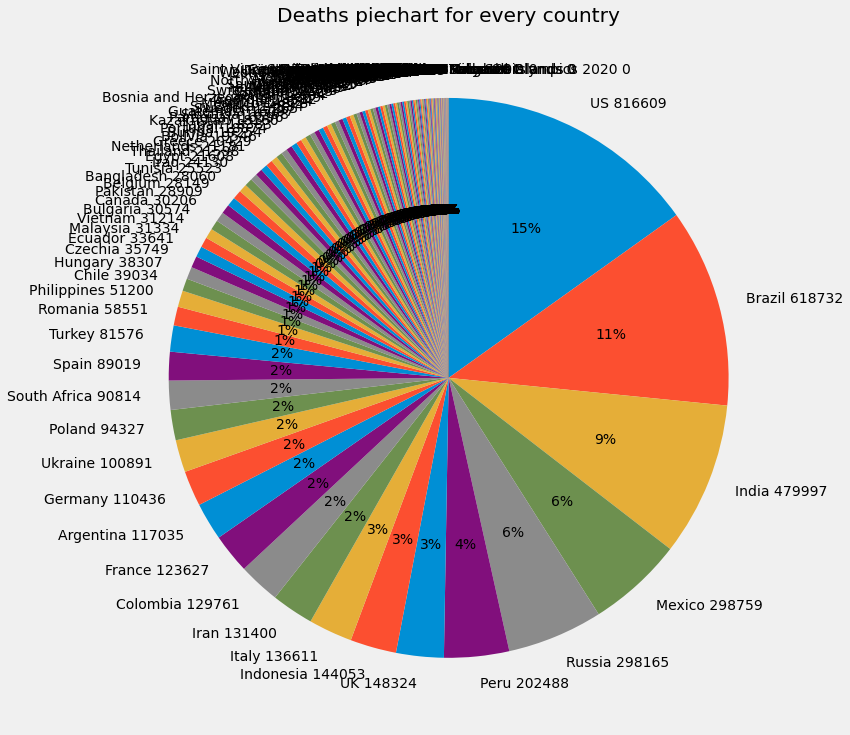

In [35]:
piechart('Deaths')

World total:  6466


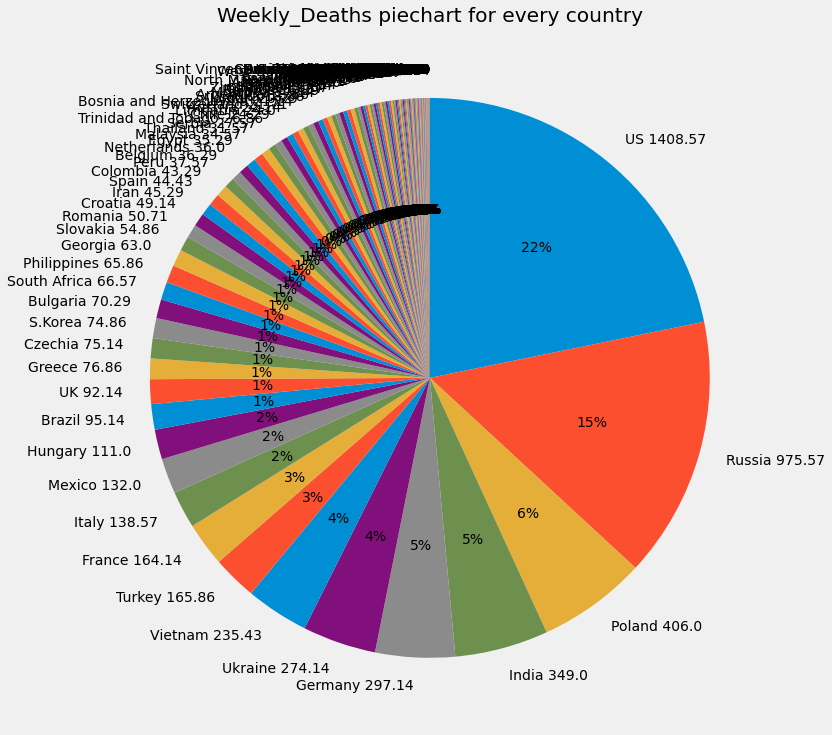

In [36]:
piechart('Weekly_Deaths')

World total:  3398


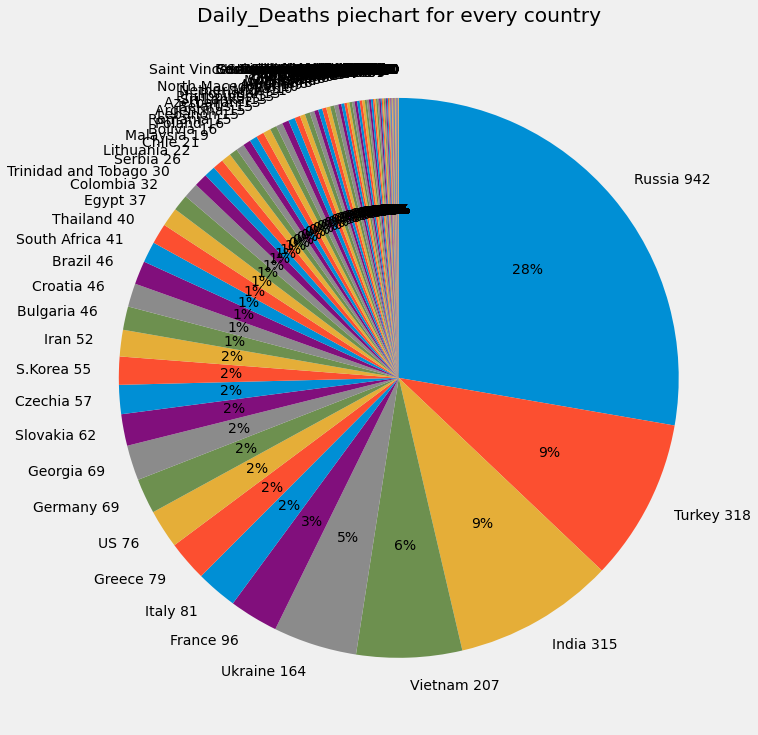

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-12-27


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1080058400.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 5542276] `date` update
 1 file changed, 2120 insertions(+), 2126 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (66%)


To https://github.com/Arrowheadahp/COVID-19.git
   cac0138..5542276  master -> master
